In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import seaborn as sns
import matplotlib

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

plt.style.use('seaborn-paper')
plt.style.use('seaborn-whitegrid')

In [3]:
colours = sns.color_palette("tab20c")
colours_b = sns.color_palette("tab20b")

# Data upload

In [4]:
data_path = ''
plots_path = ''


In [4]:
## SRM Data UNADJUSTED

temp_NDC_SRM = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC_SRM.csv')
temp_NDC_5_SRM = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC5_SRM.csv')
temp_NDC_10_SRM = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC10_SRM.csv')

q_NDC_17_SRM = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC_SRM.csv')
q_NDC_83_SRM = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC_SRM.csv')
q_NDC5_17_SRM = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC5_SRM.csv')
q_NDC5_83_SRM = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC5_SRM.csv')
q_NDC10_17_SRM = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC10_SRM.csv')
q_NDC10_83_SRM = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC10_SRM.csv')



In [5]:
## SRM Data SRM ADJUSTED

temp_NDC_Sa = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC_Sa.csv')
#temp_NDC_5_Sa = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC5_CDRSRM22.csv')
temp_NDC_10_Sa = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC10_Sa.csv')

q_NDC_17_Sa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC_Sa.csv')
q_NDC_83_Sa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC_Sa.csv')
#q_NDC5_17_Sa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC5.csv')
#q_NDC5_83_Sa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC5.csv')
q_NDC10_17_Sa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC10_Sa.csv')
q_NDC10_83_Sa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC10_Sa.csv')




In [6]:
## SRM Data SRM & CDR ADJUSTED

temp_NDC_SCa = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC_SCa.csv')
temp_NDC_5_SCa = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC5_SCa.csv')
temp_NDC_10_SCa = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_NDC10_SCa.csv')

q_NDC_17_SCa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC_SCa.csv')
q_NDC_83_SCa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC_SCa.csv')
q_NDC5_17_SCa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC5_SCa.csv')
q_NDC5_83_SCa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC5_SCa.csv')
q_NDC10_17_SCa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_NDC10_SCa.csv')
q_NDC10_83_SCa = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_NDC10_SCa.csv')




In [7]:
## noSRM Data

temp_noSRM = pd.read_csv(data_path + 'median_temperatures_csv/' + 'temp_med_allscen_2000.csv')

rf_noSRM = pd.read_csv(data_path + 'median_rf_csv/' + 'rf_med_allscen_2000.csv')

em_world = pd.read_csv(data_path + 'em_world.csv')

temp_q_17 = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q17_2000.csv')
temp_q_83 = pd.read_csv(data_path + 'quantile_temperatures_csv/' + 'temp_q83_2000.csv')

rf_q_17 = pd.read_csv(data_path + 'quantile_rf_csv/' + 'rf_q17_2000.csv')
rf_q_83 = pd.read_csv(data_path + 'quantile_rf_csv/' + 'rf_q83_2000.csv')

In [8]:
def df_prep(df, col_name, drop_num):
    df.drop(df.index[:drop_num], inplace = True)
    df['YEARS'] = range(1765,2501)
    df.rename(columns={df.columns[1]: col_name }, inplace = True)
    df = df[['YEARS', col_name]]
    df = df.reset_index(drop = True)
    
    df[df.columns[1:]] = df[df.columns[1:]].astype(float)
    
    return df

temp_NDC_SRM = df_prep(temp_NDC_SRM, 'NDC', 7)
temp_NDC_5_SRM = df_prep(temp_NDC_5_SRM, 'NDC5', 7)
temp_NDC_10_SRM = df_prep(temp_NDC_10_SRM, 'NDC10', 7)

q_NDC_17_SRM = df_prep(q_NDC_17_SRM, 'NDC', 6)
q_NDC_83_SRM = df_prep(q_NDC_83_SRM, 'NDC', 6)
q_NDC5_17_SRM = df_prep(q_NDC5_17_SRM, 'NDC5', 6)
q_NDC5_83_SRM = df_prep(q_NDC5_83_SRM, 'NDC5', 6)
q_NDC10_17_SRM = df_prep(q_NDC10_17_SRM, 'NDC10', 6)
q_NDC10_83_SRM = df_prep(q_NDC10_83_SRM, 'NDC10', 6)


temp_NDC_Sa = df_prep(temp_NDC_Sa, 'NDC', 7)
#temp_NDC_5_Sa = df_prep(temp_NDC_5_Sa, 'NDC5', 7)
temp_NDC_10_Sa = df_prep(temp_NDC_10_Sa, 'NDC10', 7)

q_NDC_17_Sa = df_prep(q_NDC_17_Sa, 'NDC', 6)
q_NDC_83_Sa = df_prep(q_NDC_83_Sa, 'NDC', 6)
#q_NDC5_17_Sa = df_prep(q_NDC5_17_Sa, 'NDC5', 6)
#q_NDC5_83_Sa = df_prep(q_NDC5_83_Sa, 'NDC5', 6)
q_NDC10_17_Sa = df_prep(q_NDC10_17_Sa, 'NDC10', 6)
q_NDC10_83_Sa = df_prep(q_NDC10_83_Sa, 'NDC10', 6)




In [9]:
temp_NDC_SCa = df_prep(temp_NDC_SCa, 'NDC', 7)
temp_NDC_5_SCa = df_prep(temp_NDC_5_SCa, 'NDC5', 7)
temp_NDC_10_SCa = df_prep(temp_NDC_10_SCa, 'NDC10', 7)

q_NDC_17_SCa = df_prep(q_NDC_17_SCa, 'NDC', 6)
q_NDC_83_SCa = df_prep(q_NDC_83_SCa, 'NDC', 6)
q_NDC5_17_SCa = df_prep(q_NDC5_17_SCa, 'NDC5', 6)
q_NDC5_83_SCa = df_prep(q_NDC5_83_SCa, 'NDC5', 6)
q_NDC10_17_SCa = df_prep(q_NDC10_17_SCa, 'NDC10', 6)
q_NDC10_83_SCa = df_prep(q_NDC10_83_SCa, 'NDC10', 6)

In [11]:
def df_prep_noSRM(df, drop_num):
    df.drop(df.index[:drop_num], inplace = True)
    df['YEARS'] = range(1765,2501)
    df.rename(columns={df.columns[1]: 'NDC10' }, inplace = True)
    df.rename(columns={df.columns[2]: 'NDC' }, inplace = True)
    df.rename(columns={df.columns[3]: 'NDC5' }, inplace = True)
    
    df = df[['YEARS', 'NDC', 'NDC10', 'NDC5']]
    df = df.reset_index(drop = True)
    
    df[df.columns[1:]] = df[df.columns[1:]].astype(float)
    df = df[185:]   # to start in 1950
    return df

temp_noSRM = df_prep_noSRM(temp_noSRM, 7)
rf_noSRM = df_prep_noSRM(rf_noSRM, 7)
em_world = df_prep_noSRM(em_world, 7)

temp_q_17 = df_prep_noSRM(temp_q_17, 6)
temp_q_83 = df_prep_noSRM(temp_q_83, 6)

rf_q_17 = df_prep_noSRM(rf_q_17, 6)
rf_q_83 = df_prep_noSRM(rf_q_83, 6)


## Solar Irradiance Data


In [97]:
solar_rf_med_NDC = pd.read_csv(data_path + 'NDC/solar_radiation/HISTRCP2009_SOLAR_RF_2318.IN', sep = "\t")
solar_rf_med_NDC10 = pd.read_csv(data_path + 'NDC_10/solar_radiation/HISTRCP2009_SOLAR_RF_2331.IN', sep = "\t")
solar_rf_med_NDC5 = pd.read_csv(data_path + 'NDC_5/solar_radiation/HISTRCP2009_SOLAR_RF_2400.IN', sep = "\t")

solar_rf_med_NDC_adj = pd.read_csv(data_path + 'NDC/solar_radiation/SOLAR_RF_2318_adj.IN', sep = "\t")
solar_rf_med_NDC10_adj = pd.read_csv(data_path + 'NDC_10/solar_radiation/SOLAR_RF_2331_adj.IN', sep = "\t")
solar_rf_med_NDC5_adj = pd.read_csv(data_path + 'NDC_5/solar_radiation/SOLAR_RF_2349_adj.IN', sep = "\t")

solar_rf_q17_NDC_adj = pd.read_csv(data_path + 'NDC/solar_radiation/SOLAR_RF_2296_adj.IN', sep = "\t")
solar_rf_q17_NDC10_adj = pd.read_csv(data_path + 'NDC_10/solar_radiation/SOLAR_RF_2307_adj.IN', sep = "\t")
solar_rf_q17_NDC5_adj = pd.read_csv(data_path + 'NDC_5/solar_radiation/SOLAR_RF_2313_17_adj.IN', sep = "\t")

solar_rf_q83_NDC_adj = pd.read_csv(data_path + 'NDC/solar_radiation/SOLAR_RF_2443_adj.IN', sep = "\t")
solar_rf_q83_NDC10_adj = pd.read_csv(data_path + 'NDC_10/solar_radiation/SOLAR_RF_2456_adj.IN', sep = "\t")
solar_rf_q83_NDC5_adj = pd.read_csv(data_path + 'NDC_5/solar_radiation/SOLAR_RF_2499_83_adj.IN', sep = "\t")



# no SRM Plots


## Emissions Plot

<Figure size 1584x1584 with 0 Axes>

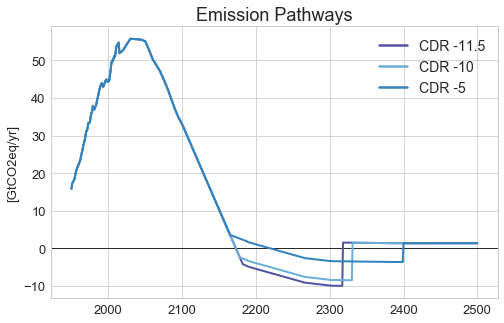

In [65]:

fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [8, 5])


ax.axhline(linewidth=0.8, color='black')

ax.plot(em_world.YEARS, em_world.NDC,
        linewidth = 2, color = colours_b[1])
ax.plot(em_world.YEARS, em_world.NDC10, 
        linewidth = 2, color = colours[1])
ax.plot(em_world.YEARS, em_world.NDC5, 
        linewidth = 2, color = colours[0])




custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2.5),
                Line2D([0], [0], color=colours[1], lw=2.5),
                Line2D([0], [0], color=colours[0], lw=2.5)]


plt.legend(custom_lines, ['CDR -11.5', 'CDR -10','CDR -5'], fontsize = 14, frameon = False);  #, 'CDR -10 GtCO2/yr', 'CDR -5 GtCO2/yr']);



plt.title(
    "Emission Pathways", fontsize = 18)
ax.set_ylabel("[GtCO2eq/yr]", fontsize = 13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
    

plt.savefig(plots_path + 'emissions_2000.png', bbox_inches= 'tight', dpi = 300);

## Temperature

<Figure size 1584x1584 with 0 Axes>

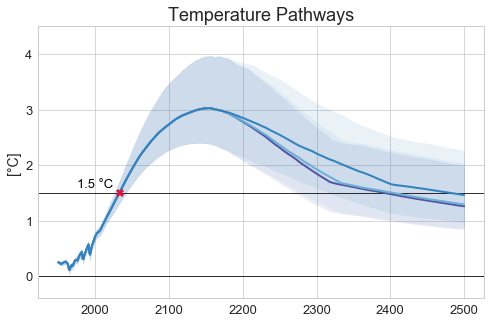

In [66]:

fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [8, 5])

ax.axhline(y = 1.5, linewidth=0.8, color='black')
ax.axhline(linewidth=0.8, color='black')


ax.fill_between(
        temp_q_17.YEARS,
        temp_q_17.NDC,
        temp_q_83.NDC,
        color=colours_b[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        temp_q_17.YEARS,
        temp_q_17.NDC10,
        temp_q_83.NDC10,
        color=colours[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        temp_q_17.YEARS,
        temp_q_17.NDC5,
        temp_q_83.NDC5,
        color=colours[0],
        alpha=0.1,
        zorder=1.5)



ax.plot(temp_noSRM.YEARS, temp_noSRM.NDC, 
        linewidth = 2, color = colours_b[1])
ax.plot(temp_noSRM.YEARS, temp_noSRM.NDC10, 
        linewidth = 2, color = colours[1])
ax.plot(temp_noSRM.YEARS, temp_noSRM.NDC5, 
        linewidth = 2, color = colours[0])




ax.text(1975, 1.6, '1.5 °C', color = 'black', fontsize = 13)
ax.plot(2033, 1.5, marker='X', color = 'crimson', markersize = '8')


custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2),
                Line2D([0], [0], color=colours[1], lw=2),
                Line2D([0], [0], color=colours[0], lw=2)]


#plt.legend(custom_lines, [  'CDR -11.5 GtCO2/yr', 'CDR -10 GtCO2/yr','CDR -5 GtCO2/yr'], fontsize = 12);  #, 'CDR -10 GtCO2/yr', 'CDR -5 GtCO2/yr']);


ax.set_ylim(-0.4, 4.5)


plt.title(
    "Temperature Pathways", fontsize = 18)
ax.set_ylabel("[°C]", fontsize = 14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig(plots_path + 'temperature_noSRM_ranges.png', bbox_inches= 'tight', dpi = 300);

## Radiative Forcing 

<Figure size 1584x1584 with 0 Axes>

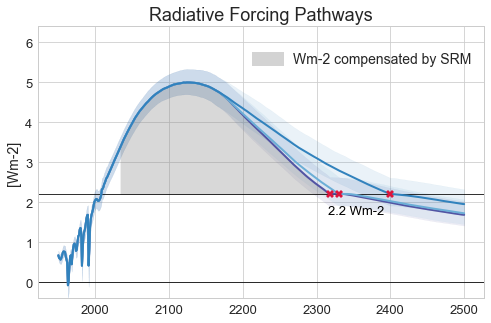

In [68]:
fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [8, 5])

ax.axhline(y = 2.2, linewidth=0.8, color='black')
ax.axhline(linewidth=0.8, color='black')

ax.fill_between(
        rf_q_17.YEARS,
        rf_q_17.NDC,
        rf_q_83.NDC,
        color=colours_b[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        rf_q_17.YEARS,
        rf_q_17.NDC10,
        rf_q_83.NDC10,
        color=colours[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        rf_q_17.YEARS,
        rf_q_17.NDC5,
        rf_q_83.NDC5,
        color=colours[0],
        alpha=0.1,
        zorder=1.5)

ax.plot(rf_noSRM.YEARS, rf_noSRM.NDC, 
        linewidth = 2, color = colours_b[1])
ax.plot(rf_noSRM.YEARS, rf_noSRM.NDC10, 
        linewidth = 2, color = colours[1])
ax.plot(rf_noSRM.YEARS, rf_noSRM.NDC5, 
        linewidth = 2, color = colours[0])

ax.fill_between(
        rf_noSRM.YEARS[84:368] ,  #srm start and end date   
        np.array([2.2] * 284),              
        rf_noSRM.NDC[84:368],  
        color='gray',
        alpha=0.3,
        zorder=1.5,
    )


ax.text(2315, 1.7, '2.2 Wm-2', color = 'black', fontsize = 13)
ax.plot(2318, 2.2, marker='X', color = 'crimson', markersize = '8')
ax.plot(2331, 2.2, marker='X', color = 'crimson', markersize = '8')
ax.plot(2400, 2.2, marker='X', color = 'crimson', markersize = '8')


cust_lines = handles=[mpatches.Patch(color='lightgray', lw = 4)]

ax.legend(cust_lines, ['Wm-2 compensated by SRM'], bbox_to_anchor=(1,0.95), loc = 'upper right', fontsize = 14) 

ax.set_ylim(-0.4, 6.4)

plt.title(
    "Radiative Forcing Pathways", fontsize = 18)
ax.set_ylabel("[Wm-2]", fontsize = 14)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
    
plt.savefig(plots_path + 'rf_noSRM_ranges.png', bbox_inches= 'tight', dpi = 300);

# Figure 1 - 4 panels

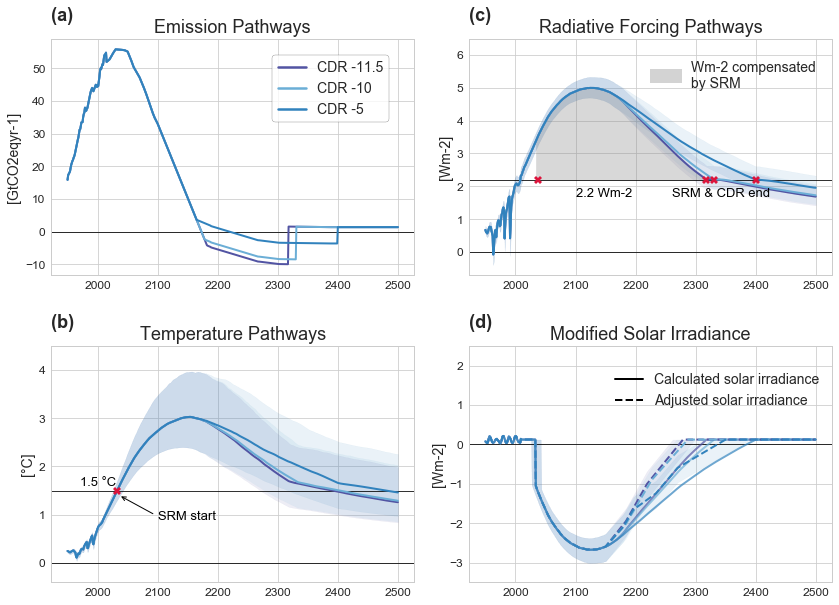

In [290]:
fig,ax=plt.subplots(ncols=2, nrows=2,figsize=(14,10))


##### Emissions
ax[0, 0].axhline(linewidth=0.8, color='black')

ax[0, 0].plot(em_world.YEARS, em_world.NDC,
        linewidth = 2, color = colours_b[1])
ax[0, 0].plot(em_world.YEARS, em_world.NDC10, 
        linewidth = 2, color = colours[1])
ax[0, 0].plot(em_world.YEARS, em_world.NDC5, 
        linewidth = 2, color = colours[0])


custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2.5),
                Line2D([0], [0], color=colours[1], lw=2.5),
                Line2D([0], [0], color=colours[0], lw=2.5)]

leg = ax[0, 0].legend(custom_lines, ['CDR -11.5', 'CDR -10','CDR -5'], bbox_to_anchor=(0.95,0.96), frameon = True,
                #fancybox=True,
                fontsize = 14)

leg.get_frame().set_edgecolor('black')


ax[0, 0].set_title("Emission Pathways", fontsize = 18)
ax[0, 0].set_ylabel("[GtCO2eqyr-1]", fontsize = 14)



### Temperature

ax[1, 0].axhline(y = 1.5, linewidth=0.8, color='black')
ax[1, 0].axhline(linewidth=0.8, color='black')

ax[1, 0].fill_between(
        temp_q_17.YEARS,
        temp_q_17.NDC,
        temp_q_83.NDC,
        color=colours_b[1],
        alpha=0.1,
        zorder=1.5)
ax[1, 0].fill_between(
        temp_q_17.YEARS,
        temp_q_17.NDC10,
        temp_q_83.NDC10,
        color=colours[1],
        alpha=0.1,
        zorder=1.5)
ax[1, 0].fill_between(
        temp_q_17.YEARS,
        temp_q_17.NDC5,
        temp_q_83.NDC5,
        color=colours[0],
        alpha=0.1,
        zorder=1.5)


ax[1, 0].plot(temp_noSRM.YEARS, temp_noSRM.NDC, 
        linewidth = 2, color = colours_b[1])
ax[1, 0].plot(temp_noSRM.YEARS, temp_noSRM.NDC10, 
        linewidth = 2, color = colours[1])
ax[1, 0].plot(temp_noSRM.YEARS, temp_noSRM.NDC5, 
        linewidth = 2, color = colours[0])

ax[1, 0].text(1970, 1.6, '1.5 °C', color = 'black', fontsize = 13)
ax[1, 0].plot(2033, 1.5, marker='X', color = 'crimson', markersize = '8')

ax[1, 0].text(2100, 0.9, 'SRM start', color = 'black', fontsize = 13)
ax[1, 0].annotate("", xy=(2036, 1.4), xytext=(2095, 1), arrowprops=dict(arrowstyle="->",lw=1))


custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2),
                Line2D([0], [0], color=colours[1], lw=2),
                Line2D([0], [0], color=colours[0], lw=2)]

ax[1, 0].set_ylim(-0.4, 4.5)


ax[1, 0].set_title(
    "Temperature Pathways", fontsize = 18)
ax[1, 0].set_ylabel("[°C]", fontsize = 14)


###### Radiative Forcing


ax[0, 1].axhline(y = 2.2, linewidth=0.8, color='black')
ax[0, 1].axhline(linewidth=0.8, color='black')

ax[0, 1].fill_between(
        rf_q_17.YEARS,
        rf_q_17.NDC,
        rf_q_83.NDC,
        color=colours_b[1],
        alpha=0.1,
        zorder=1.5)
ax[0, 1].fill_between(
        rf_q_17.YEARS,
        rf_q_17.NDC10,
        rf_q_83.NDC10,
        color=colours[1],
        alpha=0.1,
        zorder=1.5)
ax[0, 1].fill_between(
        rf_q_17.YEARS,
        rf_q_17.NDC5,
        rf_q_83.NDC5,
        color=colours[0],
        alpha=0.1,
        zorder=1.5)

ax[0, 1].plot(rf_noSRM.YEARS, rf_noSRM.NDC, 
        linewidth = 2, color = colours_b[1])
ax[0, 1].plot(rf_noSRM.YEARS, rf_noSRM.NDC10, 
        linewidth = 2, color = colours[1])
ax[0, 1].plot(rf_noSRM.YEARS, rf_noSRM.NDC5, 
        linewidth = 2, color = colours[0])

ax[0, 1].fill_between(
        rf_noSRM.YEARS[84:368] ,  #srm start and end date   
        np.array([2.2] * 284),              
        rf_noSRM.NDC[84:368],  
        color='gray',
        alpha=0.3,
        zorder=1.5,
    )


ax[0, 1].text(2100, 1.7, '2.2 Wm-2', color = 'black', fontsize = 13)
ax[0, 1].text(2260, 1.68, 'SRM & CDR end', color = 'black', fontsize = 13)
ax[0, 1].plot(2318, 2.2, marker='X', color = 'crimson', markersize = '8')
ax[0, 1].plot(2331, 2.2, marker='X', color = 'crimson', markersize = '8')
ax[0, 1].plot(2400, 2.2, marker='X', color = 'crimson', markersize = '8')
ax[0, 1].plot(2037, 2.2, marker='X', color = 'crimson', markersize = '8')


cust_lines = handles=[mpatches.Patch(color='lightgray', lw = 4)]

ax[0, 1].legend(cust_lines, ['Wm-2 compensated \nby SRM'], bbox_to_anchor=(1,0.96), loc = 'upper right', fontsize = 14) 

ax[0, 1].set_ylim(-0.7, 6.5)

ax[0, 1].set_title(
    "Radiative Forcing Pathways", fontsize = 18)
ax[0, 1].set_ylabel("[Wm-2]", fontsize = 14)


######### Solar irradiance

ax[1, 1].axhline(linewidth=0.8, color='black')

def solir_plot(df_solar, col, linsty, alp):
    ax[1, 1].plot(df_solar.COLCODE, df_solar.mod_RF, 
        linewidth = 2, color = col, linestyle = linsty, alpha = alp)
    return ax[1, 1]


solir_plot(solar_rf_med_NDC[340:891], colours_b[1], '-', 0.7)
solir_plot(solar_rf_med_NDC10[340:891], colours[1], '-', 0.7)
solir_plot(solar_rf_med_NDC5[340:891], colours[0], '-', 0.7)

solir_plot(solar_rf_med_NDC_adj[340:891], colours_b[1], '--', 1)
solir_plot(solar_rf_med_NDC10_adj[340:891], colours[1], '--', 1)
solir_plot(solar_rf_med_NDC5_adj[340:891], colours[0], '--', 1)


def solir_ranges(df_solar_17, df_solar_83, col):
    ax[1, 1].fill_between(
        df_solar_17.COLCODE,
        df_solar_17.mod_RF,
        df_solar_83.mod_RF,
        color = col,
        alpha = 0.1,
        zorder = 1.5)
    return ax[1, 1]

solir_ranges(solar_rf_q17_NDC_adj[340:891], solar_rf_q83_NDC_adj[340:891], colours_b[1])   #colours_b[1]
solir_ranges(solar_rf_q17_NDC5_adj[340:891], solar_rf_q83_NDC5_adj[340:891], colours[0])    #colours[0]
solir_ranges(solar_rf_q17_NDC10_adj[340:891], solar_rf_q83_NDC10_adj[340:891], colours[1])    #colours[1]


ax[1, 1].set_ylim(-3.5, 2.5)


custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2),
                Line2D([0], [0], color=colours[1], lw=2),
                Line2D([0], [0], color=colours[0], lw=2)]


#leg1 = ax.legend(custom_lines, [  'CDR -11.5', 'CDR -10','CDR -5'], fontsize = 12);  #, 'CDR -10 GtCO2/yr', 'CDR -5 GtCO2/yr']);

cust_lines = [Line2D([0], [0], color='black', lw=2),
                Line2D([0], [0], color='black', lw=2, ls = '--')]

ax[1, 1].legend(cust_lines, ['Calculated solar irradiance', 'Adjusted solar irradiance'],bbox_to_anchor=(1,0.94), 
          loc = 'upper right', fontsize = 14) 

ax[1, 1].set_title(
    "Modified Solar Irradiance", fontsize = 18)
    
ax[1, 1].set_ylabel("[Wm-2]", fontsize = 14)


#matplotlib.rc('xtick', labelsize=12) 
#matplotlib.rc('ytick', labelsize=12)


#ax[0, 0].text(1890, 65, 'a',
#    fontsize=18, fontweight='bold', va='top', ha='right')
#ax[0, 1].text(1890, 4.7, 'b',
#  fontsize=18, fontweight='bold', va='top', ha='right')
#ax[1, 0].text(1890, 4.7, 'c',
#  fontsize=18, fontweight='bold', va='top', ha='right')
#ax[1, 1].text(1890, 4.7, 'd',
#  fontsize=18, fontweight='bold', va='top', ha='right')

ax[0, 0].set_title(
    "(a)", loc = 'left', fontsize = 18, weight='bold').set_position([0, 1.05])
ax[0, 1].set_title(
    "(c)", loc = 'left', fontsize = 18, weight='bold').set_position([0, 1.05])
ax[1, 0].set_title(
    "(b)", loc = 'left', fontsize = 18, weight='bold').set_position([0, 1.05])
ax[1, 1].set_title(
    "(d)", loc = 'left', fontsize = 18, weight='bold').set_position([0, 1.05])


plt.subplots_adjust(wspace = 0.15, hspace = 0.3)

plt.savefig(plots_path + 'Figure_1.png',dpi=600, bbox_inches= 'tight');


# SRM temperature

## unadjusted

<Figure size 1584x1584 with 0 Axes>

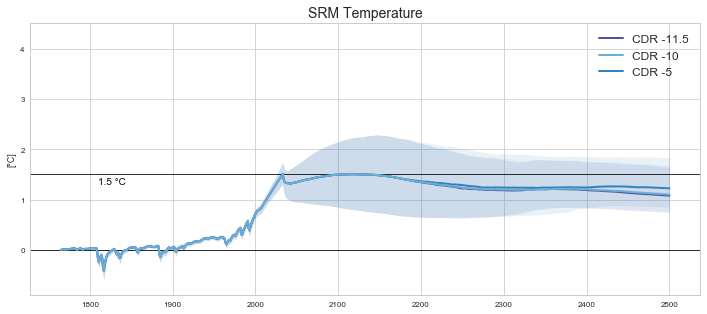

In [17]:


fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [12, 5])

ax.axhline(y = 1.5, linewidth=0.8, color='black')
ax.axhline(linewidth=0.8, color='black')


ax.fill_between(
        temp_NDC_SRM.YEARS,
        q_NDC_17_SRM.NDC,
        q_NDC_83_SRM.NDC,
        color=colours_b[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        q_NDC10_17_SRM.YEARS,
        q_NDC10_17_SRM.NDC10,
        q_NDC10_83_SRM.NDC10,
        color=colours[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        q_NDC5_17_SRM.YEARS,
        q_NDC5_17_SRM.NDC5,
        q_NDC5_83_SRM.NDC5,
        color=colours[0],
        alpha=0.1,
        zorder=1.5)


ax.plot(temp_NDC_SRM.YEARS, temp_NDC_SRM.NDC, label = 'CDR -11.5 GtCO2/yr',
        linewidth = 2, color = colours_b[1])
ax.plot(temp_NDC_5_SRM.YEARS, temp_NDC_5_SRM.NDC5, label = 'CDR -5 GtCO2/yr',
        linewidth = 2, color = colours[0])
ax.plot(temp_NDC_10_SRM.YEARS, temp_NDC_10_SRM.NDC10, label = 'CDR -10 GtCO2/yr',
        linewidth = 2, color = colours[1])





ax.text(1810, 1.3, '1.5 °C', color = 'black', fontsize = )


custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2),
                Line2D([0], [0], color=colours[1], lw=2),
                Line2D([0], [0], color=colours[0], lw=2)]


plt.legend(custom_lines, [  'CDR -11.5', 'CDR -10','CDR -5'], fontsize = 13);  #, 'CDR -10 GtCO2/yr', 'CDR -5 GtCO2/yr']);


ax.set_ylim(-0.9, 4.5)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)


plt.title(
    "SRM Temperature", fontsize = 18)
ax.set_ylabel("[°C]")

plt.savefig(plots_path + 'SRM_temp_allscen_ranges.png', bbox_inches= 'tight', dpi = 300);

## Sa adjusted

<Figure size 1584x1584 with 0 Axes>

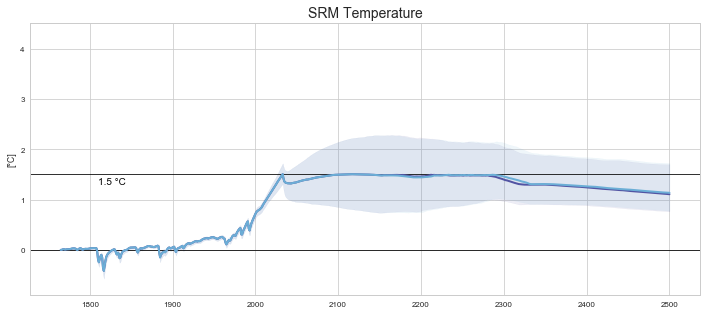

In [12]:

fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [12, 5])

ax.axhline(y = 1.5, linewidth=0.8, color='black')
ax.axhline(linewidth=0.8, color='black')


ax.fill_between(
        q_NDC_17_Sa.YEARS,
        q_NDC_17_Sa.NDC,
        q_NDC_83_Sa.NDC,
        color=colours_b[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        q_NDC10_17_Sa.YEARS,
        q_NDC10_17_Sa.NDC10,
        q_NDC10_83_Sa.NDC10,
        color=colours[1],
        alpha=0.1,
        zorder=1.5)
#ax.fill_between(
#        q_NDC5_17_SRM.YEARS,
#        q_NDC5_17_SRM.NDC5,
#        q_NDC5_83_SRM.NDC5,
#        color=colours[0],
#        alpha=0.1,
#        zorder=1.5)



ax.plot(temp_NDC_Sa.YEARS, temp_NDC_Sa.NDC, 
        linewidth = 2, color = colours_b[1])
ax.plot(temp_NDC_10_Sa.YEARS, temp_NDC_10_Sa.NDC10, 
        linewidth = 2, color = colours[1])
#ax.plot(temp_NDC_5_SRM.YEARS, temp_NDC_5_SRM.NDC5, 
#        linewidth = 2, color = colours[0])




ax.text(1810, 1.3, '1.5 °C', color = 'black')


custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2),
                Line2D([0], [0], color=colours[1], lw=2),
                Line2D([0], [0], color=colours[0], lw=2)]


#plt.legend(custom_lines, [  'CDR -11.5 GtCO2/yr', 'CDR -10 GtCO2/yr','CDR -5 GtCO2/yr'], fontsize = 12);  #, 'CDR -10 GtCO2/yr', 'CDR -5 GtCO2/yr']);


ax.set_ylim(-0.9, 4.5)


plt.title(
    "SRM Temperature", fontsize = 14)
ax.set_ylabel("[°C]")
    

plt.savefig(plots_path + 'temp_Sa_ranges.png', bbox_inches= 'tight', dpi = 300);

## SCa adjusted

<Figure size 1584x1584 with 0 Axes>

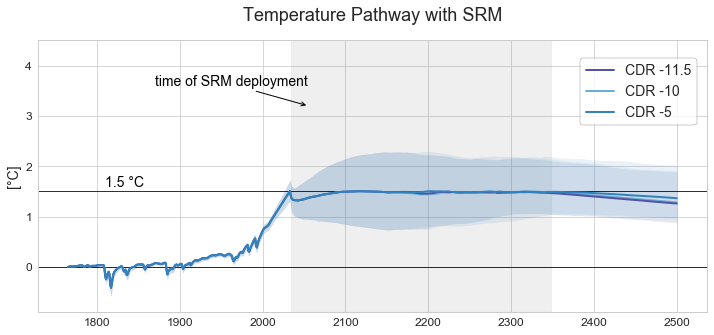

In [291]:

fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [12, 5])


ax.axvspan(
        2034,
        2349,
        ymin = 0, ymax = 1,
        color='gray',
        alpha=0.12)

ax.axhline(y = 1.51, linewidth=0.8, color='black')
ax.axhline(linewidth=0.8, color='black')


ax.fill_between(
        q_NDC_17_SCa.YEARS,
        q_NDC_17_SCa.NDC,
        q_NDC_83_SCa.NDC,
        color=colours_b[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        q_NDC10_17_SCa.YEARS,
        q_NDC10_17_SCa.NDC10,
        q_NDC10_83_SCa.NDC10,
        color=colours[1],
        alpha=0.1,
        zorder=1.5)
ax.fill_between(
        q_NDC5_17_SCa.YEARS,
        q_NDC5_17_SCa.NDC5,
        q_NDC5_83_SCa.NDC5,
        color=colours[0],
        alpha=0.1,
        zorder=1.5)




ax.plot(temp_NDC_10_SCa.YEARS, temp_NDC_10_SCa.NDC10, 
        linewidth = 2, color = colours[1])
ax.plot(temp_NDC_SCa.YEARS, temp_NDC_SCa.NDC, 
        linewidth = 2, color = colours_b[1])
ax.plot(temp_NDC_5_SCa.YEARS, temp_NDC_5_SCa.NDC5, 
        linewidth = 2, color = colours[0])

#ax.annotate('SRM deployment', xy=(0.5, 0.80), xytext=(0.5, 0.90), xycoords='axes fraction', 
#            fontsize=20, ha='center', va='bottom',
#            bbox=dict(boxstyle='square', fc='white'),
#            arrowprops=dict(arrowstyle='-[, widthB=7.0, lengthB=1.5', lw=2.0))


ax.text(1810, 1.6, '1.5 °C', color = 'black', fontsize = 14)
ax.text(1870, 3.6, 'time of SRM deployment', color = 'black', fontsize = 14)

ax.annotate("", xy=(2055, 3.2), xytext=(1990, 3.5), arrowprops=dict(arrowstyle="->",lw=1))

custom_lines = [Line2D([0], [0], color=colours_b[1], lw=2),
                Line2D([0], [0], color=colours[1], lw=2),
                Line2D([0], [0], color=colours[0], lw=2)]


#plt.legend(custom_lines, [  'CDR -11.5', 'CDR -10','CDR -5'], fontsize = 14);  #, 'CDR -10 GtCO2/yr', 'CDR -5 GtCO2/yr']);

leg = ax.legend(custom_lines, ['CDR -11.5', 'CDR -10','CDR -5'], bbox_to_anchor=(0.8,0.96), frameon = True,
                fancybox=True,
                fontsize = 14)

leg.get_frame().set_edgecolor('black')
ax.set_ylim(-0.9, 4.5)


plt.title(
    "Temperature Pathway with SRM", fontsize = 18).set_position([.5, 1.05])
ax.set_ylabel("[°C]", fontsize = 14)
    

plt.savefig(plots_path + 'temp_SCA_ranges.png', bbox_inches= 'tight', dpi = 300);

# Boxplot uncertainties

In [10]:
from matplotlib.collections import PatchCollection
#from matplotlib.patches import Rectangle
import matplotlib.patches as patches

<Figure size 1584x1584 with 0 Axes>

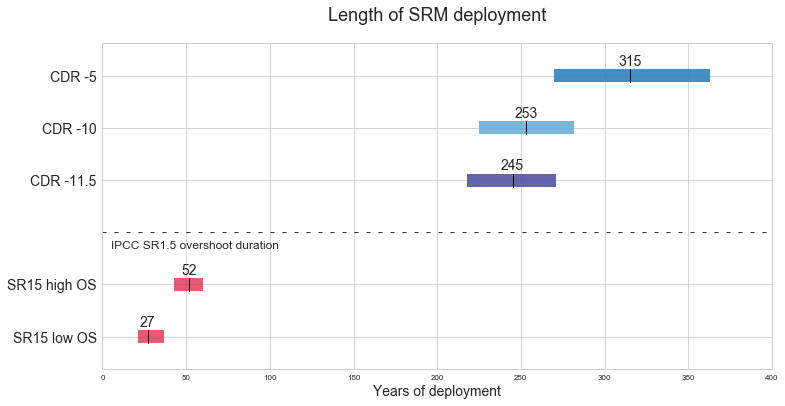

In [22]:
fig = plt.figure(figsize=(22, 22))
fig, ax = plt.subplots(figsize = [12, 6])

#NDC
x_NDC = [(218,53)]
y_NDC = (12,1)

#NDC_10
x_NDC10 = [(225,57)]
y_NDC10 = (16,1)

#NDC_10
x_NDC5 = [(270,93)]
y_NDC5 = (20,1)


#CDR15 high overshoot
x_CDR = [(43, 17)]
y_CDR = (4,1)

#CDR15 low overshoot
x_CDR_lo = [(21, 16)]
y_CDR_lo = (0,1)




# Plot the broken horizontal bars
plt.broken_barh(x_NDC, y_NDC, facecolors=colours_b[1], alpha = 0.9)
plt.broken_barh(x_NDC10, y_NDC10, facecolors=colours[1], alpha = 0.9)
plt.broken_barh(x_NDC5, y_NDC5, facecolors=colours[0], alpha = 0.9)

plt.broken_barh(x_CDR, y_CDR, facecolors='crimson', alpha = 0.7)
plt.broken_barh(x_CDR_lo, y_CDR_lo, facecolors='crimson', alpha = 0.7)

plt.plot([27, 27], [0, 1], 'k-', lw=1)
plt.plot([52, 52], [4, 5], 'k-', lw=1)
plt.plot([245, 245], [12, 13], 'k-', lw=1)
plt.plot([253, 253], [16, 17], 'k-', lw=1)
plt.plot([315, 315], [20, 21], 'k-', lw=1)

ax.set_yticks([0.5, 4.5, 12.5, 16.5, 20.5])
ax.set_yticklabels(['SR15 low OS','SR15 high OS','CDR -11.5', 'CDR -10', 'CDR -5'], fontsize = 14)

ax.set_xlim([0, 400])
ax.set_ylim([-2, 23])

plt.title('Length of SRM deployment', fontsize = 18).set_position([.5, 1.05])

plt.xlabel('Years of deployment', fontsize = 14)

plt.text(245, 13.6, '245', horizontalalignment='center',
         verticalalignment='center', fontsize = 14)

plt.text(253, 17.6, '253', horizontalalignment='center',
         verticalalignment='center', fontsize = 14)

plt.text(315, 21.6, '315', horizontalalignment='center',
         verticalalignment='center', fontsize = 14)

plt.text(52, 5.6, '52', horizontalalignment='center',
         verticalalignment='center', fontsize = 14)

plt.text(27, 1.6, '27', horizontalalignment='center',
         verticalalignment='center', fontsize = 14)

plt.text(5, 7.5, 'IPCC SR1.5 overshoot duration', #horizontalalignment='center',
         verticalalignment='center', fontsize = 12)

ax.axhline(y = 8.5, linewidth=0.8, color='black', linestyle = (0, (5, 10)))

#ax.set_xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])

plt.savefig(plots_path + 'SRM_len_SR15.png', bbox_inches= 'tight', dpi = 300)